# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

# Scrape the website
html = browser.html


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [5]:
# Create Empty Lists

# Create Empty List for Column Headers
column_headers = []

# Create Empty List for Rows of Data
weather_list = []

In [6]:
# Loop through the scraped data to create List of Column Headers

# Find Header names
columns = soup.find_all('th')

# Loop through Header Names and append to List
for column in columns:
    column_headers.append(column.text)

column_headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [7]:
# Extract all rows of data
rows = soup.find_all(class_ = 'data-row')

# Loop through scraped data to create List of Rows (Dictionaries)
for row in rows:
    column_values = row.find_all('td')
    
    # Create Dictionary for each Row/Index
    weather_dict = {column_headers[0]: column_values[0].text,
                    column_headers[1]: column_values[1].text,
                    column_headers[2]: column_values[2].text,
                    column_headers[3]: column_values[3].text,
                    column_headers[4]: column_values[4].text,
                    column_headers[5]: column_values[5].text,
                    column_headers[6]: column_values[6].text}
    
    # Append Row/Dictionary to List
    weather_list.append(weather_dict)

In [8]:
# Display List of Rows
weather_list

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [9]:
# Create a Pandas DataFrame using a List of Dictionaries
weather_df = pd.DataFrame(weather_list)

# Or:

weather_df2 = pd.json_normalize(weather_list)

In [10]:
# Confirm DataFrame was created successfully
weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
# REFERENCE: https://www.geeksforgeeks.org/change-data-type-for-one-or-more-columns-in-pandas-dataframe/
weather_df[['terrestrial_date']] =\
weather_df[['terrestrial_date']].apply(pd.to_datetime)

weather_df[['sol', 'ls', 'month', 'min_temp', 'pressure']] =\
weather_df[['sol', 'ls', 'month', 'min_temp', 'pressure']].apply(pd.to_numeric)

In [13]:
# Confirm type changes were successful by examining data types again
weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
print(weather_df.groupby('month')['month'].count())

no_months_mars = weather_df['month'].nunique()
print(f'\nThere are {no_months_mars} months on Mars')

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

There are 12 months on Mars


In [152]:
# 2. How many Martian days' worth of data are there?
mars_days = weather_df.groupby('sol')['sol'].count().sum()

print(f'There are {mars_days} martian days worth of data.')

There are 1867 martian days worth of data.


In [153]:
# 3. What is the average low temperature by month?
weather_df.groupby('month')['min_temp'].mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

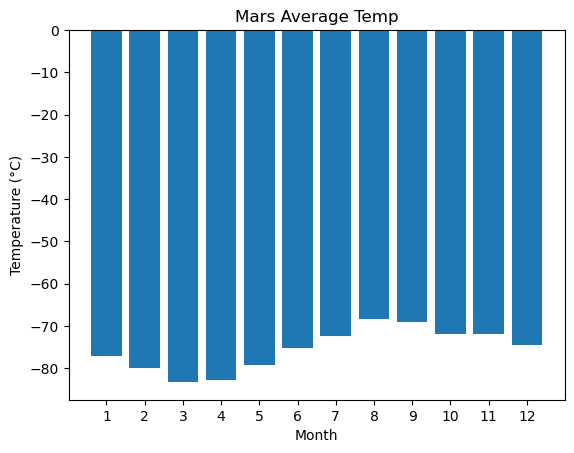

In [154]:
# Plot the average temperature by month
avg_temp = weather_df.groupby('month')['min_temp'].mean()
avg_temp_df = pd.DataFrame(avg_temp)

# Define x and y axes
x = avg_temp_df.index
y = avg_temp_df['min_temp']

# Plot Bar Graph
plt.bar(x,y)

# Set x-ticks on x-axis (show every Month)
plt.xticks(x[::])

# Set title and axis labels
plt.title('Mars Average Temp')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

# Show plot
plt.show()


        min_temp
month           
3     -83.307292

The coldest month on Mars (according to Curiosity) is month 3.

        min_temp
month           
8     -68.382979

The hottest month on Mars (according to Curiosity)is month 8.


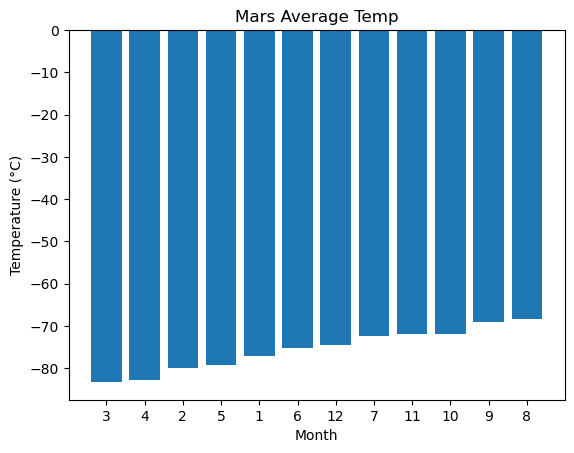

In [155]:
# Identify the coldest and hottest months in Curiosity's location

# Sort dataframe by coldest to warmest month
sorted_temp_df = avg_temp_df.sort_values('min_temp')

# Determine the coldest month on Mars
coldest_month_df = sorted_temp_df[sorted_temp_df['min_temp']==sorted_temp_df['min_temp'].min()]
print(f"{coldest_month_df}\n")
coldest_month = sorted_temp_df.index[0]
print(f'The coldest month on Mars (according to Curiosity) is month {coldest_month}.\n')

# Determine the hottest month on Mars
hottest_month_df = sorted_temp_df[sorted_temp_df['min_temp']==sorted_temp_df['min_temp'].max()]
print(hottest_month_df)
hottest_month = sorted_temp_df.index[-1]
print(f'\nThe hottest month on Mars (according to Curiosity)is month {hottest_month}.')

# Define x and y axes
x = sorted_temp_df.index.astype(str)
y = sorted_temp_df['min_temp']

# Plot Bar Graph
plt.bar(x,y)

# Set x-ticks on x-axis (show every Month)
plt.xticks(x[::])

# Set title and axis labels
plt.title('Mars Average Temp')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

# Show plot
plt.show()


In [156]:
# 4. Average pressure by Martian month
avg_pressure = weather_df.groupby('month')['pressure'].mean()
print(avg_pressure.sort_values())

# Create DataFrame from Month and Pressure Groupby object
avg_pressure_df = pd.DataFrame(avg_pressure).sort_values('pressure')

# Get Low Pressure Month and corresponding Value
low_press_mnth, low_press_val = avg_pressure_df.index[0], round(avg_pressure_df.iloc[0][0], 2)

# Get High Pressure Month and corresponding Value
high_press_mnth, high_press_val = avg_pressure_df.index[-1], round(avg_pressure_df.iloc[-1][0], 2)

print(f'\nThe month with the lowest average pressure is month {low_press_mnth} ({low_press_val}).')
print(f'The month with the highest average pressure is month {high_press_mnth} ({high_press_val}).')


month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

The month with the lowest average pressure is month 6 (745.05).
The month with the highest average pressure is month 9 (913.31).


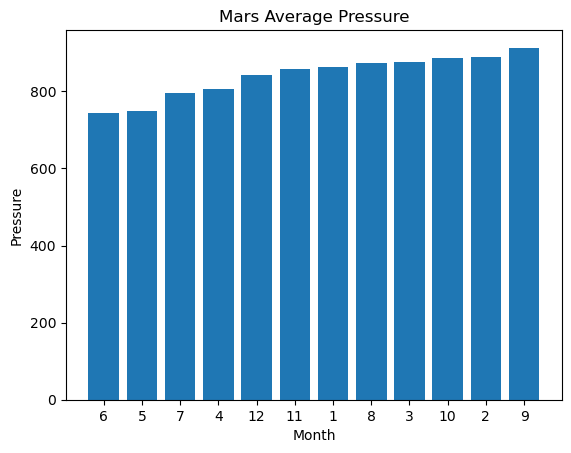

In [157]:
# Plot the average pressure by month

# Create DataFrame from Groupby Series
avg_pressure_df = pd.DataFrame(avg_pressure).sort_values('pressure')

# Define x and y axes
x = avg_pressure_df.index.astype(str)
y = avg_pressure_df['pressure']

# Plot Bar Graph
plt.bar(x,y)

# Set x-ticks on x-axis (show every Month)
plt.xticks(x[::])

# Set title and axis labels
plt.title('Mars Average Pressure')
plt.xlabel('Month')
plt.ylabel('Pressure')

# Show plot
plt.show()

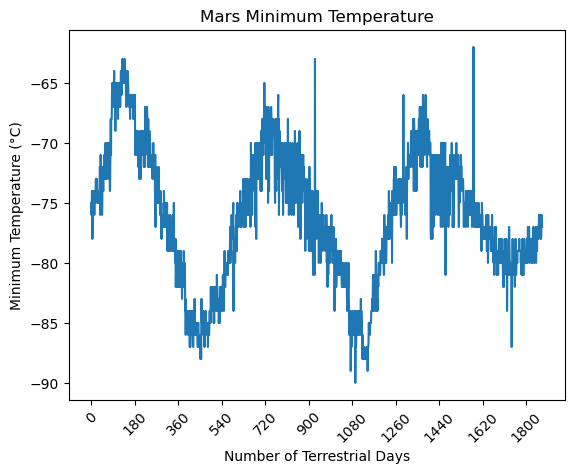

In [168]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Get total number of terrestrial days in dataset to plot data
mars_days = weather_df.groupby('terrestrial_date')['terrestrial_date'].count().sum()

# Define x and y axes
x = np.arange(0, mars_days)
y = weather_df['min_temp']

# Plot Bar Graph
plt.plot(x,y)

# Set x-ticks on x-axis (set x-ticks to every 180 Earth days)
plt.xticks(x[::180], rotation=45)

# Set title and axis labels
plt.title('Mars Minimum Temperature')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')

# Show plot
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [163]:
# Write the data to a CSV
export_df = weather_df.set_index('id')
export_df.to_csv('output/mars_weather.csv', index=True, header=True)

In [164]:
browser.quit()